# Importing Libraries :

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from scipy.stats import zscore
from scipy.stats import boxcox

# Splitting and model training
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# problem statement :

In [ ]:
# The goal of this project was to predict health insurance premiums based on various factors like age, gender, health insurance coverage, BMI, and more.

# Data Gathering : 

In [2]:
df = pd.read_excel('height_weight_data .Xlsx')
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,1,krushna,0.250000,male,61.4,6.4,500000,7015
1,2,pavan,0.333333,male,63.9,7.0,500000,7015
2,3,ketan,0.416667,male,65.9,7.5,500000,7015
3,4,akash,0.500000,male,67.6,7.9,500000,7015
4,5,syam,0.583333,male,69.2,8.3,500000,7015
...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,female,155.0,NaN,10000000,111340
1672,1673,mira,82.000000,female,155.0,65.0,10000000,111340
1673,1674,radha,83.000000,female,155.0,65.0,10000000,111340
1674,1675,lakshmi,84.000000,female,155.0,65.0,10000000,111340


In [17]:
df.shape

(1676, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   object 
 4   Height (cm)             1669 non-null   float64
 5   Weight(kg)              1670 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 104.9+ KB


# To find a missing value : 

In [19]:
df.isnull().sum()

Sr.no                     0
Name                      0
Age(yrs)                  0
Gender                    0
Height (cm)               7
Weight(kg)                6
Health Insurance cover    0
Premium                   0
dtype: int64

In [20]:
df.isnull() # False : Value present , True : NaN value present 

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1671,False,False,False,False,False,True,False,False
1672,False,False,False,False,False,False,False,False
1673,False,False,False,False,False,False,False,False
1674,False,False,False,False,False,False,False,False


## EDA :

## 1. Sr.no

In [21]:
len(df['Sr.no'].unique())

1676

In [22]:
df['Sr.no'].unique()

array([   1,    2,    3, ..., 1674, 1675, 1676], dtype=int64)

In [23]:
df['Sr.no'].nunique()

1676

In [ ]:
>> We can drop this feature as it contains all unique values

## 2. Name :

In [ ]:
>> We can  drop this feature as it contains all unique values

## 3. Age(yrs) :

In [24]:
df['Age(yrs)']

0        0.250000
1        0.333333
2        0.416667
3        0.500000
4        0.583333
          ...    
1671    81.000000
1672    82.000000
1673    83.000000
1674    84.000000
1675    85.000000
Name: Age(yrs), Length: 1676, dtype: float64

In [25]:
df['Age(yrs)'].isnull().sum()

0

In [ ]:
>> This feature does not contain any null values 

## cheking for normality of data :

In [ ]:
# Formula : z_score = (x- Xmean)/std.dev

In [ ]:
# The plot helps you visualize the shape of the distribution and whether it resembles a normal distribution.

<AxesSubplot:xlabel='Age(yrs)', ylabel='Density'>

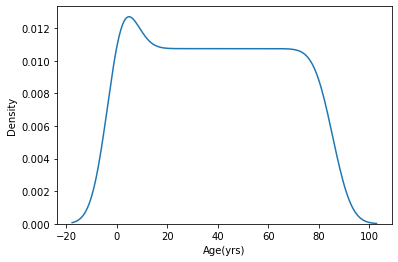

In [26]:
sns.kdeplot(df['Age(yrs)'])

In [27]:
def get_outliers(df,column):
    mean = column.mean()
    std = column.std()
    outliers_list = []
    threshold = 3
    
    for x in column.values:
        zscore = (x-mean)/std
        
        if np.abs(zscore) > threshold:
            outliers_list.append(x)
            
    return outliers_list

In [28]:
get_outliers(df,df['Age(yrs)'])

[]

# checking for outliers

<AxesSubplot:xlabel='Age(yrs)'>

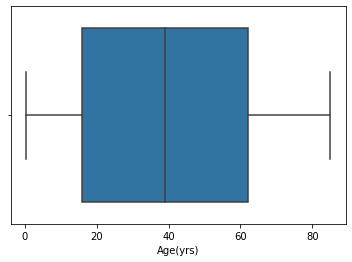

In [30]:
sns.boxplot(x = df['Age(yrs)'])

In [ ]:
# There is no outlier present 

## 4. Gender 

In [31]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [32]:
df['Gender'].nunique()

2

In [ ]:
# This is categorial feature apply replace

# 5.Height (cm)

In [33]:
df['Height (cm)']

0        61.4
1        63.9
2        65.9
3        67.6
4        69.2
        ...  
1671    155.0
1672    155.0
1673    155.0
1674    155.0
1675    155.0
Name: Height (cm), Length: 1676, dtype: float64

In [34]:
df['Height (cm)'].isnull().sum()

7

In [ ]:
# This feature contains some missing values which can handled by filling it with mean or median

In [35]:
df['Height (cm)'].nunique()

161

# cheking for normality of data :

<AxesSubplot:xlabel='Height (cm)', ylabel='Density'>

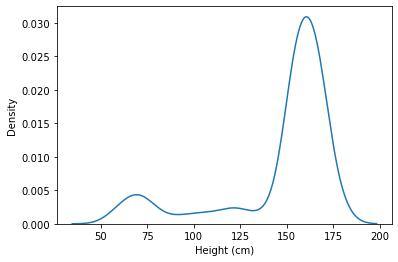

In [36]:
sns.kdeplot(df['Height (cm)'])

In [37]:
def get_outliers(df,column):
    mean = column.mean()
    std = column.std()
    threshold = 3
    outliers_list = []
    
    for x in column.values:
        zscore = (x-mean)/std
        
        if np.abs(zscore) > 3:
            outliers_list.append(x)
    return outliers_list

get_outliers(df,df['Height (cm)'])          

[]

In [38]:
def get_outliers(df):
    outliers_list = []
    z_score = zscore(df['Height (cm)'])
    index = np.where(np.abs(z_score) > 3)[0]
    print(df['Height (cm)'].iloc[index])
    return outliers_list

get_outliers(df)

Series([], Name: Height (cm), dtype: float64)


[]

<AxesSubplot:xlabel='Height (cm)'>

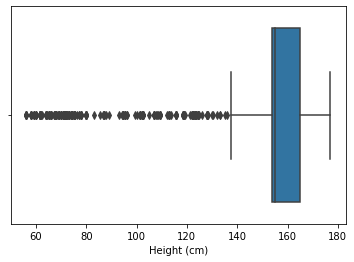

In [39]:
sns.boxplot(x = df['Height (cm)'])

In [ ]:
# If skewness is less than -1 the distribution is highly negatively skewed.
# If skewness is greater than 1, the distribution is highly positively skewed.

In [40]:
df['Height (cm)'].skew() 

-1.7123886226781593

# Highly Negatively Skewed

In [41]:
boxcox(df['Height (cm)'])

(array([1.66575983e+14, 2.33590711e+14, 3.03285292e+14, ...,
        4.25397282e+17, 4.25397282e+17, 4.25397282e+17]),
 8.472135811722177)

<AxesSubplot:>

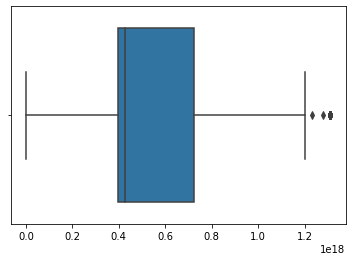

In [42]:
sns.boxplot(x = boxcox(df['Height (cm)'])[0])

# Health Insurance cover

In [43]:
df['Health Insurance cover']

0         500000
1         500000
2         500000
3         500000
4         500000
          ...   
1671    10000000
1672    10000000
1673    10000000
1674    10000000
1675    10000000
Name: Health Insurance cover, Length: 1676, dtype: int64

In [44]:
df['Health Insurance cover'].isnull().sum()

0

<AxesSubplot:xlabel='Health Insurance cover', ylabel='Density'>

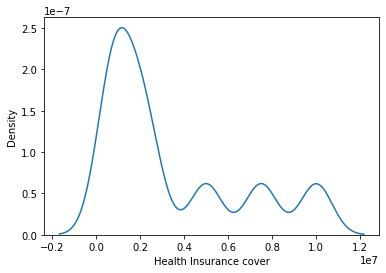

In [45]:
sns.kdeplot(df['Health Insurance cover'])

In [46]:
df['Health Insurance cover'].skew()

1.009096386727808

# Highly Positively skewed

<AxesSubplot:xlabel='Health Insurance cover'>

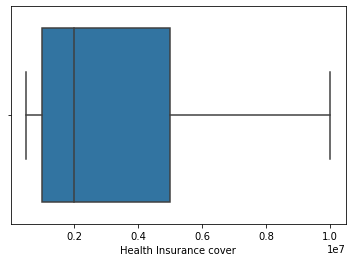

In [47]:
sns.boxplot(x = df['Health Insurance cover'])

# Deriving a new feature 

In [ ]:
BMI = weight(kg) / height(m2)

# 5. Premium 

In [48]:
df['Premium'].isnull().sum() 

0

# Feature Engineering 

In [49]:
df.drop(['Sr.no','Name'], axis = 1,inplace = True)

In [50]:
df

,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,0.250000,male,61.4,6.4,500000,7015
1,0.333333,male,63.9,7.0,500000,7015
2,0.416667,male,65.9,7.5,500000,7015
3,0.500000,male,67.6,7.9,500000,7015
4,0.583333,male,69.2,8.3,500000,7015
...,...,...,...,...,...,...
1671,81.000000,female,155.0,NaN,10000000,111340
1672,82.000000,female,155.0,65.0,10000000,111340
1673,83.000000,female,155.0,65.0,10000000,111340
1674,84.000000,female,155.0,65.0,10000000,111340


In [51]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [52]:
df['Gender'] = df['Gender'].replace({'male':0 ,'female':1})

In [53]:
df

,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,0.250000,0,61.4,6.4,500000,7015
1,0.333333,0,63.9,7.0,500000,7015
2,0.416667,0,65.9,7.5,500000,7015
3,0.500000,0,67.6,7.9,500000,7015
4,0.583333,0,69.2,8.3,500000,7015
...,...,...,...,...,...,...
1671,81.000000,1,155.0,NaN,10000000,111340
1672,82.000000,1,155.0,65.0,10000000,111340
1673,83.000000,1,155.0,65.0,10000000,111340
1674,84.000000,1,155.0,65.0,10000000,111340


In [54]:
df['BMI'] = df['Weight(kg)']/(((df['Height (cm)'])/100) * ((df['Height (cm)'])/100))

In [55]:
df['BMI']

0       16.976307
1       17.143375
2       17.269924
3       17.287560
4       17.332687
          ...    
1671          NaN
1672    27.055151
1673    27.055151
1674    27.055151
1675    27.055151
Name: BMI, Length: 1676, dtype: float64

In [56]:
df

,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium,BMI
0,0.250000,0,61.4,6.4,500000,7015,16.976307
1,0.333333,0,63.9,7.0,500000,7015,17.143375
2,0.416667,0,65.9,7.5,500000,7015,17.269924
3,0.500000,0,67.6,7.9,500000,7015,17.287560
4,0.583333,0,69.2,8.3,500000,7015,17.332687
...,...,...,...,...,...,...,...
1671,81.000000,1,155.0,NaN,10000000,111340,NaN
1672,82.000000,1,155.0,65.0,10000000,111340,27.055151
1673,83.000000,1,155.0,65.0,10000000,111340,27.055151
1674,84.000000,1,155.0,65.0,10000000,111340,27.055151


In [57]:
df.drop(['Height (cm)','Weight(kg)'], axis = 1 , inplace  = True)

In [58]:
df

,Age(yrs),Gender,Health Insurance cover,Premium,BMI
0,0.250000,0,500000,7015,16.976307
1,0.333333,0,500000,7015,17.143375
2,0.416667,0,500000,7015,17.269924
3,0.500000,0,500000,7015,17.287560
4,0.583333,0,500000,7015,17.332687
...,...,...,...,...,...
1671,81.000000,1,10000000,111340,NaN
1672,82.000000,1,10000000,111340,27.055151
1673,83.000000,1,10000000,111340,27.055151
1674,84.000000,1,10000000,111340,27.055151


In [59]:
df['BMI'].isnull().sum()

13

In [ ]:
# To fill the missing value 

In [60]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [61]:
df['BMI'].isnull().sum()

0

In [62]:
df

,Age(yrs),Gender,Health Insurance cover,Premium,BMI
0,0.250000,0,500000,7015,16.976307
1,0.333333,0,500000,7015,17.143375
2,0.416667,0,500000,7015,17.269924
3,0.500000,0,500000,7015,17.287560
4,0.583333,0,500000,7015,17.332687
...,...,...,...,...,...
1671,81.000000,1,10000000,111340,23.875115
1672,82.000000,1,10000000,111340,27.055151
1673,83.000000,1,10000000,111340,27.055151
1674,84.000000,1,10000000,111340,27.055151


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age(yrs)                1676 non-null   float64
 1   Gender                  1676 non-null   int64  
 2   Health Insurance cover  1676 non-null   int64  
 3   Premium                 1676 non-null   int64  
 4   BMI                     1676 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 65.6 KB


# Train Model:

In [64]:
x = df.drop(['Premium'],axis = 1) # independent variable
y = df['Premium']                 # # dependent variable

# Splititng Data :

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 20)

# Model Training :

In [69]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

# Evaluation :

## Training Accuracy:

In [70]:
y_pred = linear_reg_model.predict(x_train)

MSE = mean_squared_error(y_train,y_pred)
print("MSE value", MSE)

RMSE = np.sqrt(MSE)
print("RMSE value", RMSE)

MAE = mean_absolute_error(y_train,y_pred)
print("MAE value", MAE)

r2_value = r2_score(y_train,y_pred)
print("R_squared value", r2_value)

MSE value 114738693.75202626
RMSE value 10711.614899352304
MAE value 8108.910005606603
R_squared value 0.8199861753396451


# Testing Accuracy :

In [71]:
y_pred = linear_reg_model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print("MSE value", MSE)

RMSE = np.sqrt(MSE)
print("RMSE value", RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print("MAE value", MAE)

r2_value = r2_score(y_test,y_pred)
print("R_squared value", r2_value)

MSE value 105228152.37490089
RMSE value 10258.077420983958
MAE value 7756.489706874209
R_squared value 0.8383994927173307


# Scaling :

In [72]:
norm = MinMaxScaler()
norm_array = norm.fit_transform(x_train)
norm_xtrain_df = pd.DataFrame(norm_array , columns = x.columns) 

In [73]:
norm_xtrain_df

,Age(yrs),Gender,Health Insurance cover,BMI
0,0.221239,1.0,0.157895,0.338396
1,0.693215,0.0,0.210526,0.467612
2,0.185841,0.0,0.157895,0.228996
3,0.303835,0.0,0.052632,0.467612
4,0.044248,1.0,0.052632,0.031239
...,...,...,...,...
1335,0.917404,1.0,0.157895,0.614770
1336,0.339233,1.0,0.473684,0.807385
1337,0.929204,0.0,0.026316,0.424714
1338,0.020649,1.0,0.052632,0.056909


In [74]:
norm_array_test = norm.transform(x_test)
norm_xtest_df = pd.DataFrame(norm_array_test, columns = x.columns)
norm_xtest_df

,Age(yrs),Gender,Health Insurance cover,BMI
0,0.893805,1.0,0.473684,0.614770
1,0.303835,1.0,0.026316,0.382308
2,0.103245,0.0,0.157895,0.012981
3,0.327434,1.0,0.052632,0.807385
4,0.528024,0.0,0.105263,0.557739
...,...,...,...,...
331,0.008850,1.0,0.026316,0.524405
332,0.492625,1.0,0.736842,0.672555
333,0.374631,0.0,0.157895,0.569597
334,0.174041,1.0,0.105263,0.309187


# Model Training :

In [75]:
knn = KNeighborsRegressor()
knn.fit(norm_xtrain_df, y_train)

KNeighborsRegressor()

# Evaluation :

# Training Accuracy :

In [76]:
y_pred = knn.predict(norm_xtrain_df)

MSE = mean_squared_error(y_train,y_pred)
print("MSE value", MSE)

RMSE = np.sqrt(MSE)
print("RMSE value", RMSE)

MAE = mean_absolute_error(y_train,y_pred)
print("MAE value", MAE)

r2_value = r2_score(y_train,y_pred)
print("R_squared value", r2_value)

MSE value 9269361.828358209
RMSE value 3044.5626661900405
MAE value 1391.376119402985
R_squared value 0.9854572749582658


# Testing Accuracy :

In [77]:
y_pred = knn.predict(norm_xtest_df)

MSE = mean_squared_error(y_test,y_pred)
print("MSE value", MSE)

RMSE = np.sqrt(MSE)
print("RMSE value", RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print("MAE value", MAE)

r2_value = r2_score(y_test,y_pred)
print("R_squared value", r2_value)

MSE value 9645116.199404761
RMSE value 3105.6587384007216
MAE value 1605.0744047619048
R_squared value 0.9851878453109106
